In [1]:
# Business Case
# Assuming you are working in a bank and a customer is requesting for house loan
# You need to estimate the amount of loan you could grant to the customer
# Hence you need to estimate the value of the house
# You are to create model to predict the value of the house using machine learning model
# There are 10 attributes and you have finally decided on 'town', 'flat_type','floor_area_sqm','flat_model', 'lease_commence_date'.
# Remember to use dummy variables on categorical input => you should have 55 columns include Y
# Remember to split train test using default rates
# Normalize floor_area_sqm using zscore
# All machine learning use default setting
# measurement is rmse
# random state is 1 (need to use in train test split and model creation)
# data visualization is needed. At least use one of pandas, seaborn and matplotlib.

# the results should be regression 62455, Decision Tree 43711,Random Forest 40131, GBoost 62325, NN 151107

# how to improve the results by change the features selected, data wrangling or parameter setting
# Qualitatively, explain the pros and cons about your model
# How to overcome the weakness of your model (future study)
# the important of your model to the bank

# Good luck, Enjoy doing your homework



In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("ResaleFlatPrice.csv")

In [4]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [5]:
df.isnull().any()

month                  False
town                   False
flat_type              False
block                  False
street_name            False
storey_range           False
floor_area_sqm         False
flat_model             False
lease_commence_date    False
remaining_lease        False
resale_price           False
dtype: bool

In [6]:
df["flat_model"].value_counts()

Model A                   7664
Improved                  5560
New Generation            3056
Premium Apartment         2122
Simplified                 930
Apartment                  816
Maisonette                 662
Standard                   647
DBSS                       310
Model A2                   254
Model A-Maisonette          46
Adjoined flat               46
Type S1                     37
Type S2                     16
Terrace                     14
Multi Generation            14
Premium Apartment Loft       4
Premium Maisonette           4
Improved-Maisonette          2
Name: flat_model, dtype: int64

In [7]:
df = df.loc[:, ['town', 'flat_type','floor_area_sqm','flat_model', 'lease_commence_date', "resale_price"]]

In [8]:
df

,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,ANG MO KIO,3 ROOM,68.0,New Generation,1981,270000.0
1,ANG MO KIO,3 ROOM,73.0,New Generation,1976,295000.0
2,ANG MO KIO,3 ROOM,67.0,New Generation,1978,270000.0
3,ANG MO KIO,3 ROOM,67.0,New Generation,1978,230000.0
4,ANG MO KIO,3 ROOM,68.0,New Generation,1981,262500.0
...,...,...,...,...,...,...
22199,YISHUN,EXECUTIVE,142.0,Apartment,1988,580000.0
22200,YISHUN,EXECUTIVE,146.0,Maisonette,1988,565000.0
22201,YISHUN,EXECUTIVE,164.0,Apartment,1992,633000.0
22202,YISHUN,EXECUTIVE,164.0,Apartment,1992,788888.0


In [9]:
from scipy import stats

In [10]:
## Normalizing the Z Score Value using the Z Score value 
df["floor_area_sqm"] = stats.zscore(df["floor_area_sqm"])

In [11]:
## Encoding the town variable:
d = pd.get_dummies(df["town"])

In [12]:
## Merging the new town variable and removing the non encoded data:
df = df.merge(d,left_index=True,right_index=True).drop(columns="town")

In [13]:
df.head()

,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,ANG MO KIO,BEDOK,BISHAN,BUKIT BATOK,BUKIT MERAH,...,PASIR RIS,PUNGGOL,QUEENSTOWN,SEMBAWANG,SENGKANG,SERANGOON,TAMPINES,TOA PAYOH,WOODLANDS,YISHUN
0,3 ROOM,-1.193788,New Generation,1981,270000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3 ROOM,-0.988498,New Generation,1976,295000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3 ROOM,-1.234846,New Generation,1978,270000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3 ROOM,-1.234846,New Generation,1978,230000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3 ROOM,-1.193788,New Generation,1981,262500.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
## Encoding the flat type
d = pd.get_dummies(df["flat_type"])

In [15]:
## Merging the new datafram as previously done for town
df = df.merge(d,left_index=True,right_index=True).drop(columns="flat_type")

In [16]:
## Encoding
d = pd.get_dummies(df["flat_model"])

In [17]:
df = df.merge(d,left_index=True,right_index=True).drop(columns="flat_model")

In [18]:
df

,floor_area_sqm,lease_commence_date,resale_price,ANG MO KIO,BEDOK,BISHAN,BUKIT BATOK,BUKIT MERAH,BUKIT PANJANG,BUKIT TIMAH,...,Multi Generation,New Generation,Premium Apartment,Premium Apartment Loft,Premium Maisonette,Simplified,Standard,Terrace,Type S1,Type S2
0,-1.193788,1981,270000.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,-0.988498,1976,295000.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,-1.234846,1978,270000.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,-1.234846,1978,230000.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,-1.193788,1981,262500.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22199,1.844515,1988,580000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22200,2.008748,1988,565000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22201,2.747795,1992,633000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22202,2.747795,1992,788888.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
X = df.drop(columns="resale_price")

In [20]:
Y = df["resale_price"]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1)

In [23]:
from sklearn import linear_model

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
model = linear_model.LinearRegression()

In [26]:
model.fit(X_train,Y_train)
pred = model.predict(X_test)
print("rmse is ", mean_squared_error(Y_test,pred)**0.5)

rmse is  62455.43131423422


In [27]:
from sklearn import tree

In [30]:
## CART model:
model = tree.DecisionTreeRegressor(random_state=1)

In [31]:
model.fit(X_train,Y_train)
pred = model.predict(X_test)
print("rmse is ", mean_squared_error(Y_test,pred)**0.5)

rmse is  43711.16010257397


In [32]:
from sklearn import ensemble

In [34]:
## Random Forest Model:
model = ensemble.RandomForestRegressor(random_state=1)

In [35]:
model.fit(X_train,Y_train)
pred = model.predict(X_test)
print("rmse is ", mean_squared_error(Y_test,pred)**0.5)

rmse is  40131.48387287037


In [36]:
## XG Boost Model:
model = ensemble.GradientBoostingRegressor(random_state=1)

In [37]:
model.fit(X_train,Y_train)
pred = model.predict(X_test)
print("rmse is ", mean_squared_error(Y_test,pred)**0.5)

rmse is  62325.73754141881


In [38]:
from sklearn import neural_network

In [39]:
model = neural_network.MLPRegressor(random_state=1)

In [40]:
## Neural Network Model:
model.fit(X_train,Y_train)
pred = model.predict(X_test)
print("rmse is ", mean_squared_error(Y_test,pred)**0.5)

rmse is  151107.6835284498


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [41]:
from keras.models import Sequential

ImportError: Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tensorflow/python/pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: dlopen(/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so, 0x0006): tried: '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64')), '/System/Volumes/Preboot/Cryptexes/OS/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so' (no such file), '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64'))


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/install_sources#common_installation_problems

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [39]:
from keras.layers import Dense, Dropout

In [40]:
model = Sequential()

In [41]:
model.add(Dense(54,input_dim=54,activation="relu"))

In [42]:
model.add(Dropout(0.2))

In [43]:
model.add(Dense(54,activation="relu"))

In [44]:
model.add(Dropout(0.2))

In [45]:
model.add(Dense(1,activation="linear"))

In [46]:
model.add(Dropout(0.2))

In [47]:
model.compile(loss="mse",optimizer="adam",metrics=["mse"])

In [48]:
history = model.fit(X_train,Y_train,batch_size=2,epochs=30)

Epoch 1/30
8327/8327 [==============================] - 85s 3ms/step - loss: 86267242666.1748 - mse: 86267242666.1748
Epoch 2/30
8327/8327 [==============================] - 19s 2ms/step - loss: 62358189044.4419 - mse: 62358189044.4419: 3s - loss: 62180551846.9935 - mse: 6 - ETA: 2s 
Epoch 3/30
8327/8327 [==============================] - 21s 3ms/step - loss: 64206869579.2507 - mse: 64206869579.2507
Epoch 4/30
8327/8327 [==============================] - 19s 2ms/step - loss: 60891688833.0452 - mse: 60891688833.0452
Epoch 5/30
8327/8327 [==============================] - 17s 2ms/step - loss: 62217813755.9116 - mse: 62217813755.9116: 0s - loss: 62261600870.9761 - mse: 622616
Epoch 6/30
8327/8327 [==============================] - 17s 2ms/step - loss: 59799362307.6888 - mse: 59799362307.6888: 2s - loss: 60015474818.4567  - ETA: 1s - loss: 59897290705.6997 - 
Epoch 7/30
8327/8327 [==============================] - 17s 2ms/step - loss: 57153993630.6167 - mse: 57153993630.6167: 10s - loss: 5

In [49]:
import matplotlib.pyplot as plt

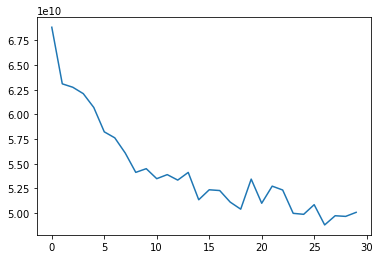

In [50]:
plt.plot(history.history['mse'])

In [51]:
result = model.evaluate(X_test,Y_test)

174/174 [==============================] - 1s 1ms/step - loss: 17732089856.0000 - mse: 17732089856.0000


In [52]:
result[1]**0.5

133161.89340798664